In [1]:
# Import necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# Import scikit-learn metrics module for model evaluation
from sklearn import metrics

# Import TensorFlow and Keras for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

# Set display options for pandas and suppress warnings
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

### *About Dataset*

##### * *This dataset encapsulates information about employee status, specifically highlighting terminations. For each of the 10 years covered, the dataset provides details on both active employees and those who have undergone termination.* 
##### * *The objective is to assess whether an employee is currently active or has been terminated based on the available data.*

In [2]:
# Read the dataset from a CSV file into a Pandas DataFrame

data = pd.read_csv('MFG10YearTerminationData.csv')

In [40]:
# Create a copy of the original DataFrame for further processing

df = data.copy()

In [41]:
# Display information about the DataFrame, including data types and non-null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [42]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


### **Insights**

##### - *The dataset doesn't contain any null values, ensuring data completeness*
##### - *The dataset comprises a mix of integer and string datatype features*
##### - *Some columns are redundant and can be safely removed without affecting the further analysis*
##### - *Certain columns, like 'termreason_desc and termtype_desc directly reveal information our deep learning Model is attempting to predict, To prevent potential data leakage and maintain model integrity, it is recommended to exclude these columns from the feature set* 

In [43]:
# Dropping unnecessary columns from the DataFrame to prepare the data for modeling.

df.drop(columns=['EmployeeID', 'gender_short', 'birthdate_key', 'terminationdate_key', 'length_of_service', 'termreason_desc', 'termtype_desc'], inplace=True)

In [7]:
df.head()

,recorddate_key,orighiredate_key,age,city_name,department_name,job_title,store_name,gender_full,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,12/31/2006 0:00,8/28/1989,52,Vancouver,Executive,CEO,35,Male,2006,ACTIVE,HEADOFFICE
1,12/31/2007 0:00,8/28/1989,53,Vancouver,Executive,CEO,35,Male,2007,ACTIVE,HEADOFFICE
2,12/31/2008 0:00,8/28/1989,54,Vancouver,Executive,CEO,35,Male,2008,ACTIVE,HEADOFFICE
3,12/31/2009 0:00,8/28/1989,55,Vancouver,Executive,CEO,35,Male,2009,ACTIVE,HEADOFFICE
4,12/31/2010 0:00,8/28/1989,56,Vancouver,Executive,CEO,35,Male,2010,ACTIVE,HEADOFFICE


In [ ]:
# Displaying the value counts for each column in the DataFrame to understand the distribution of categorical data.

for col in df.columns:
    counts = df[col].value_counts()
    print(f'{counts}\n')
    print('---------------------------')

In [11]:
df.head()

,recorddate_key,orighiredate_key,age,city_name,department_name,job_title,store_name,gender_full,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,2006-12-31,1989-08-28,52,Vancouver,Executive,CEO,35,Male,2006,ACTIVE,HEADOFFICE
1,2007-12-31,1989-08-28,53,Vancouver,Executive,CEO,35,Male,2007,ACTIVE,HEADOFFICE
2,2008-12-31,1989-08-28,54,Vancouver,Executive,CEO,35,Male,2008,ACTIVE,HEADOFFICE
3,2009-12-31,1989-08-28,55,Vancouver,Executive,CEO,35,Male,2009,ACTIVE,HEADOFFICE
4,2010-12-31,1989-08-28,56,Vancouver,Executive,CEO,35,Male,2010,ACTIVE,HEADOFFICE


### **EDA**

In [12]:
# Displaying the count of unique values in the 'STATUS' column to understand the distribution of employee status.

df['STATUS'].value_counts()

STATUS
ACTIVE        48168
TERMINATED     1485
Name: count, dtype: int64

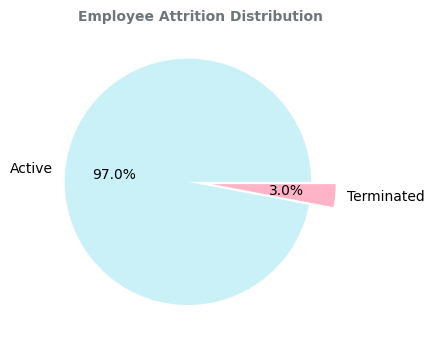

In [6]:
# Visualizing Employee Attrition Rate using a Pie Chart
plt.figure(figsize=(4,4))

plt.pie(df['STATUS'].value_counts(), colors=['#caf0f8', '#ffb3c6'], labels=['Active', 'Terminated'], autopct='%1.1f%%', explode=(0.1, 0.1))
plt.title('Employee Attrition Distribution', fontdict={'fontsize' : 10, 'weight' : 'bold', 'color' : '#6c757d'})

plt.show()

In [7]:
terminated_df = df[df['STATUS'] == 'TERMINATED']

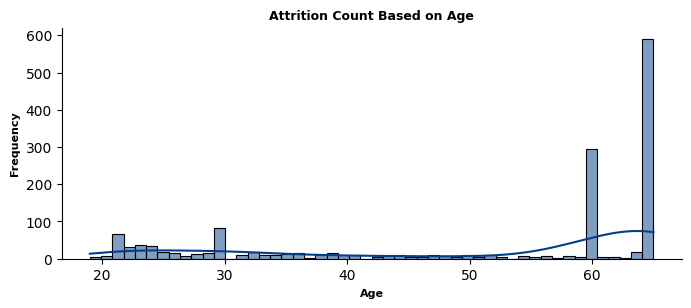

In [8]:
# Creating a histogram to visualize the distribution of terminated employees Based on Age.
plt.figure(figsize=(8,3))

sns.histplot(x='age', data=terminated_df, bins=50, color='#023e8a', kde=True)
plt.title('Attrition Count Based on Age', fontdict={'fontsize' : 9, 'weight' : 'bold'})
plt.xlabel('Age', fontdict={'fontsize' : 8, 'weight' : 'bold'})
plt.ylabel('Frequency', fontdict={'fontsize' : 8, 'weight' : 'bold'})
sns.despine()
plt.show()

In [9]:
terminated_df['gender_full'].value_counts()

gender_full
Female    915
Male      570
Name: count, dtype: int64

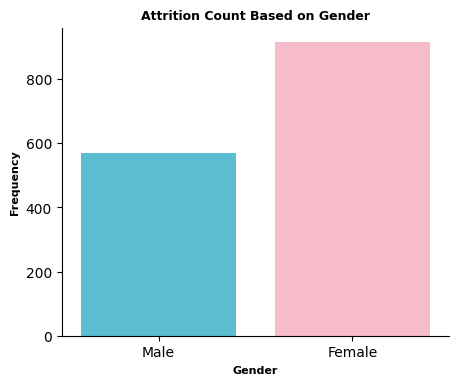

In [112]:
# Creating a Count Plot to visualize the distribution of terminated employees Based on Gender.
plt.figure(figsize=(5,4))

sns.countplot(x='gender_full', data=terminated_df, palette=['#48cae4', '#ffb3c6'])
plt.title('Attrition Count Based on Gender', fontdict={'fontsize' : 9, 'weight' : 'bold'})
plt.xlabel('Gender', fontdict={'fontsize' : 8, 'weight' : 'bold'})
plt.ylabel('Frequency', fontdict={'fontsize' : 8, 'weight' : 'bold'})
sns.despine()
plt.show()

In [10]:
termination_dep = terminated_df['department_name'].value_counts().reset_index().head(8)

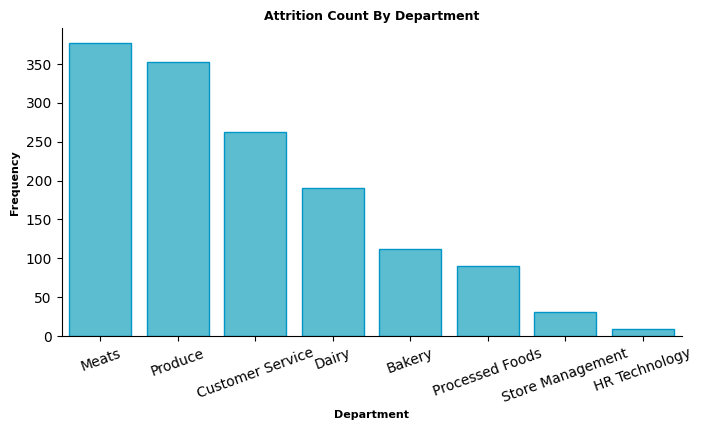

In [11]:
# Creating a BarPlot to visualize the distribution of terminated employees By Department.
plt.figure(figsize=(8,4))
sns.barplot(x='department_name', y='count', data=termination_dep, color='#48cae4', edgecolor='#0096c7')
plt.title('Attrition Count By Department', fontdict={'fontsize' : 9, 'weight' : 'bold'})
plt.xticks(rotation=20)
plt.xlabel('Department', fontdict={'fontsize' : 8, 'weight' : 'bold'})
plt.ylabel('Frequency', fontdict={'fontsize' : 8, 'weight' : 'bold'})

sns.despine()
plt.show()

In [12]:
termination_loc = terminated_df['city_name'].value_counts().reset_index().head(8)

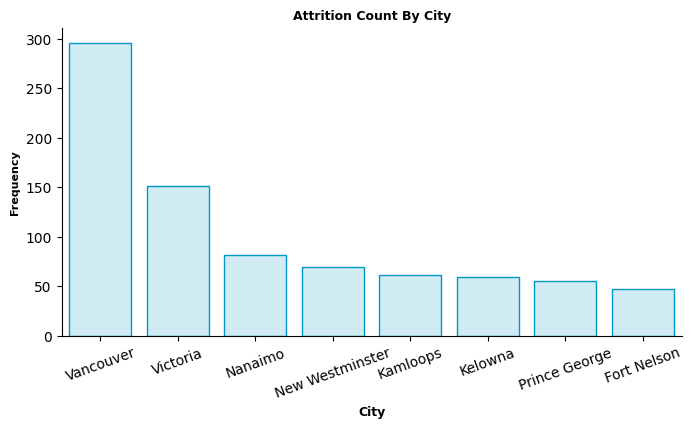

In [13]:
# Creating a BarPlot to visualize the distribution of terminated employees By City.
plt.figure(figsize=(8,4))
sns.barplot(x='city_name', y='count', data=termination_loc, color='#caf0f8', edgecolor='#0096c7')
plt.title('Attrition Count By City', fontdict={'fontsize' : 9, 'weight' : 'bold'})
plt.xticks(rotation=20)
plt.xlabel('City', fontdict={'fontsize' : 9, 'weight' : 'bold'})
plt.ylabel('Frequency', fontdict={'fontsize' : 8, 'weight' : 'bold'})

sns.despine()
plt.show()

In [44]:
scaled_df = df.copy()

In [45]:
# Converting the 'recorddate_key' and 'orighiredate_key' columns to datetime objects

scaled_df['recorddate_key'] = pd.to_datetime(scaled_df['recorddate_key'])
scaled_df['orighiredate_key'] = pd.to_datetime(scaled_df['orighiredate_key'])

In [46]:
# Selecting columns with data type 'object' from the DataFrame.

obj_cols = scaled_df.select_dtypes(include=('object')).columns

In [47]:
# Using LabelEncoder to encode categorical columns with 'object' data type in the DataFrame.

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in obj_cols:
    scaled_df[col] = encoder.fit_transform(scaled_df[col])

In [48]:
# Extracting year, month, and day components from datetime columns in the DataFrame.

scaled_df['recorddate_key_year'] = scaled_df['recorddate_key'].dt.year
scaled_df['recorddate_key_month'] = scaled_df['recorddate_key'].dt.month
scaled_df['recorddate_key_day'] = scaled_df['recorddate_key'].dt.day

scaled_df['orighiredate_key_year'] = scaled_df['orighiredate_key'].dt.year
scaled_df['orighiredate_key_month'] = scaled_df['orighiredate_key'].dt.month
scaled_df['orighiredate_key_day'] = scaled_df['orighiredate_key'].dt.day

In [49]:
# Dropping the original datetime columns ('recorddate_key' and 'orighiredate_key') from the DataFrame.

scaled_df.drop(columns=['recorddate_key', 'orighiredate_key'], inplace=True)

In [50]:
scaled_df

,age,city_name,department_name,job_title,store_name,gender_full,STATUS_YEAR,STATUS,BUSINESS_UNIT,recorddate_key_year,recorddate_key_month,recorddate_key_day,orighiredate_key_year,orighiredate_key_month,orighiredate_key_day
0,52,34,9,7,35,1,2006,0,0,2006,12,31,1989,8,28
1,53,34,9,7,35,1,2007,0,0,2007,12,31,1989,8,28
2,54,34,9,7,35,1,2008,0,0,2008,12,31,1989,8,28
3,55,34,9,7,35,1,2009,0,0,2009,12,31,1989,8,28
4,56,34,9,7,35,1,2010,0,0,2010,12,31,1989,8,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,21,33,7,14,34,1,2015,1,1,2015,12,1,2013,8,19
49649,19,34,6,9,44,0,2013,1,1,2013,8,1,2013,8,27
49650,21,38,6,9,39,0,2015,1,1,2015,12,1,2013,9,15
49651,19,15,6,9,16,0,2013,1,1,2013,12,1,2013,10,9


In [51]:
# Scaling selected numerical columns in the DataFrame using StandardScaler.

cols = ['age', 'STATUS_YEAR', 'recorddate_key_year', 'orighiredate_key_year']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in cols:
    scaled_df[col] = scaler.fit_transform(scaled_df[[col]])

In [52]:
# Splitting the DataFrame into features (x) and target variable (y).

x = scaled_df.drop(columns=['STATUS'])
y = scaled_df['STATUS']

In [53]:
# Splitting the dataset into training and testing sets using train_test_split.

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=4)

In [54]:
# Printing the shapes of the training and testing sets to verify the data splitting.

print(f'Shape of xtrain : {xtrain.shape}')
print(f'Shape of xtest : {xtest.shape}')
print(f'Shape of ytrain : {ytrain.shape}')
print(f'Shape of ytest : {ytest.shape}')

Shape of xtrain : (39722, 14)
Shape of xtest : (9931, 14)
Shape of ytrain : (39722,)
Shape of ytest : (9931,)


In [55]:
# Creating a Sequential model for binary classification.
Model = Sequential()

# Adding the Input layer with 32 units, ReLU activation, and input dimension of 14.
Model.add(Dense(units=32, activation='relu', input_dim=14))
Model.add(BatchNormalization())                                         # Adding BatchNormalization for improved training stability.

# Adding the Hidden layers with ReLU activation.
Model.add(Dense(units=64, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=128, activation='relu'))
Model.add(Dropout(0.3))

# Adding the output layer with 1 unit and sigmoid activation for binary classification.
Model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model using the Adam optimizer and binary crossentropy loss.
# Monitoring accuracy as the evaluation metric.
Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
# Creating an EarlyStopping callback to halt training when accuracy stops improving.

early_stop = EarlyStopping(monitor='accuracy', patience=5, mode='auto', verbose=0, restore_best_weights=True)

In [57]:
# Training the model on the training data with a specified number of epochs, batch size, and early stopping callback.

Model.fit(xtrain, ytrain, epochs=100, batch_size=64, callbacks=[early_stop])

Epoch 1/100


621/621 [==============================] - 4s 3ms/step - loss: 0.0186 - accuracy: 0.9963
Epoch 2/100
621/621 [==============================] - 2s 4ms/step - loss: 1.3201e-04 - accuracy: 1.0000
Epoch 3/100
621/621 [==============================] - 2s 3ms/step - loss: 1.4382e-04 - accuracy: 1.0000
Epoch 4/100
621/621 [==============================] - 2s 3ms/step - loss: 1.9838e-05 - accuracy: 1.0000
Epoch 5/100
621/621 [==============================] - 2s 3ms/step - loss: 6.5823e-06 - accuracy: 1.0000
Epoch 6/100
621/621 [==============================] - 2s 3ms/step - loss: 6.2716e-06 - accuracy: 1.0000
Epoch 7/100
621/621 [==============================] - 2s 3ms/step - loss: 2.7584e-06 - accuracy: 1.0000
Epoch 8/100
621/621 [==============================] - 2s 3ms/step - loss: 1.6294e-06 - accuracy: 1.0000
Epoch 9/100
621/621 [==============================] - 2s 3ms/step - loss: 2.2227e-06 - accuracy: 1.0000


In [59]:
# Evaluate the model on the train set and retrieve the train accuracy

train_accuracy = Model.evaluate(xtrain, ytrain)
print(f'Training Accuracy : {round(train_accuracy[1] * 100, 2)}%')

1242/1242 [==============================] - 2s 2ms/step - loss: 7.5928e-08 - accuracy: 1.0000
Training Accuracy : 100.0%


In [60]:
# Evaluate the model on the test set and retrieve the test accuracy

test_accuracy = Model.evaluate(xtest, ytest)
print(f'Testing Accuracy : {round(test_accuracy[1] * 100, 2)}%')

311/311 [==============================] - 1s 2ms/step - loss: 7.7308e-08 - accuracy: 1.0000
Testing Accuracy : 100.0%


In [62]:
# Prediction on Training set
train_pred_prob = Model.predict(xtrain)

# Convert the predictions to binary predictions (0 or 1) using a threshold
threshold = 0.5
train_pred_binary = (train_pred_prob > threshold).astype('int')

print("Classification Report for Training Set\n")
print(metrics.classification_report(ytrain, train_pred_binary))

1242/1242 [==============================] - 2s 2ms/step
Classification Report for Training Set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38514
           1       1.00      1.00      1.00      1208

    accuracy                           1.00     39722
   macro avg       1.00      1.00      1.00     39722
weighted avg       1.00      1.00      1.00     39722



In [63]:
# Prediction on Testing set
test_pred_prob = Model.predict(xtest)

# Convert the predictions to binary predictions (0 or 1) using a threshold
threshold = 0.5
test_pred_binary = (test_pred_prob > threshold).astype('int')

print("Classification Report for Testing Set\n")
print(metrics.classification_report(ytest, test_pred_binary))

311/311 [==============================] - 0s 2ms/step
Classification Report for Testing Set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9654
           1       1.00      1.00      1.00       277

    accuracy                           1.00      9931
   macro avg       1.00      1.00      1.00      9931
weighted avg       1.00      1.00      1.00      9931



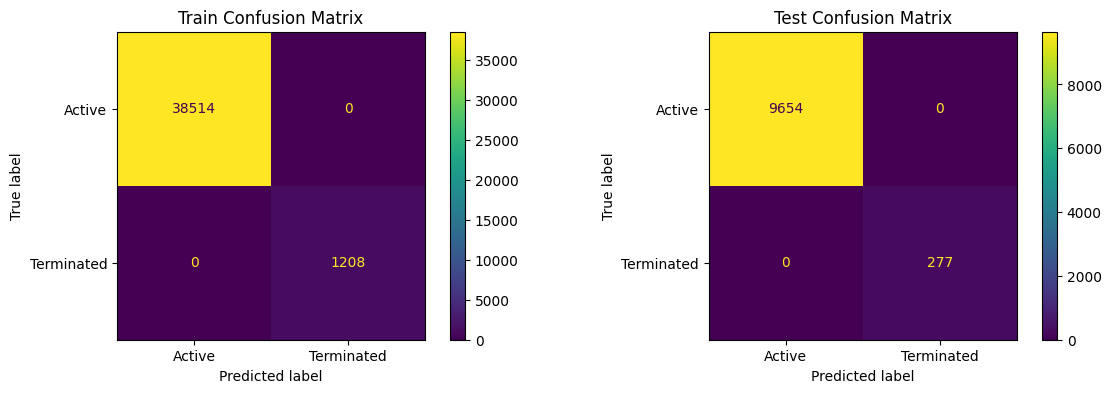

In [105]:
# Creating a Confusion Matrix

cm_train = metrics.confusion_matrix(ytrain, train_pred_binary)
cm_test = metrics.confusion_matrix(ytest, test_pred_binary)

# Creating ConfusionMatrixDisplay object

cm_train_dis = metrics.ConfusionMatrixDisplay(cm_train, display_labels=['Active', 'Terminated'])
cm_test_dis = metrics.ConfusionMatrixDisplay(cm_test, display_labels=['Active', 'Terminated'])

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

cm_train_dis.plot(ax=axs[0], values_format="d")
cm_test_dis.plot(ax=axs[1], values_format="d")

# Adding titles and labels
axs[0].set_title("Train Confusion Matrix")
axs[1].set_title("Test Confusion Matrix")

plt.show()

### **Testing**

In [69]:
class_labels = ['Active', 'Terminated']

encoder.fit(class_labels)

LabelEncoder()

In [92]:
# Creating a test DataFrame by concatenating features (xtest) and target variable (ytest) along the columns.

test_df = pd.concat([xtest, ytest], axis=1)

In [93]:
sample_record = test_df[test_df['STATUS'] == 1].sample(1)
sample_record

,age,city_name,department_name,job_title,store_name,gender_full,STATUS_YEAR,BUSINESS_UNIT,recorddate_key_year,recorddate_key_month,recorddate_key_day,orighiredate_key_year,orighiredate_key_month,orighiredate_key_day,STATUS
49615,-1.69605,14,6,9,15,1,1.190417,1,1.190417,8,1,2.038875,2,25,1


In [94]:
sample = sample_record.drop(columns=['STATUS'])

In [95]:
# Function for making predictions using the trained model.

def Predict(features):

    pred_prob = Model.predict(features)                       # Predicting probabilities using the trained model.

    threshold = 0.5
    pred_prob_binary = (pred_prob > threshold).astype('int')  # convert probabilities to binary predictions.

    pred_class = encoder.inverse_transform(pred_prob_binary)  # Inverse transforming binary predictions to obtain the predicted class.
    
    return pred_class

Predict(sample)

1/1 [==============================] - 0s 46ms/step


array(['Terminated'], dtype='<U10')